Q1. A customer informed their consultant that they have developed several formulations of petrol that gives different characteristics of burning pattern. The formulations are obtaining by adding varying levels of additives that, for example, prevent engine knocking, gum prevention, stability in storage, and etc. However, a third party certification organisation would like to verify if the formulations are significantly different, and request for both physical and statistical proof. Since the formulations are confidential information, they are not named in the dataset.

Please assist the consultant in the area of statistical analysis by doing this;

a. A descriptive analysis of the additives (columns named as “a” to “i”), which must include summaries of findings (parametric/non-parametric). Correlation and ANOVA, if applicable, is a must.

b. A graphical analysis of the additives, including a distribution study.

c. A clustering test of your choice (unsupervised learning), to determine the distinctive number of formulations present in the dataset.

ingredients.csv

In [21]:
#a. A descriptive analysis of the additives (columns named as “a” to “i”), which must include summaries of findings (parametric/non-parametric). Correlation and ANOVA, if applicable, is a must.
import pandas as pd
import matplotlib
import pingouin as pg

additives=pd.read_csv("E:\\Ingredient.csv")
correlations=additives.corr()
descriptive_stats=additives.describe()
display(correlations)
display(descriptive_stats)

df=pd.melt(additives)
aov = pg.anova(data=df, dv='value', between='variable', detailed=True)
print(aov)
#reject the null hypothesis that there's no difference between the means

,a,b,c,d,e,f,g,h,i
a,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
b,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
c,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
d,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
e,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
f,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
g,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
h,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
i,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


     Source             SS    DF             MS              F  p-unc  \
0  variable  943261.084445     8  117907.635556  168331.968858    0.0   
1    Within    1342.757047  1917       0.700447            NaN    NaN   

        np2  
0  0.998578  
1       NaN  


<AxesSubplot:>

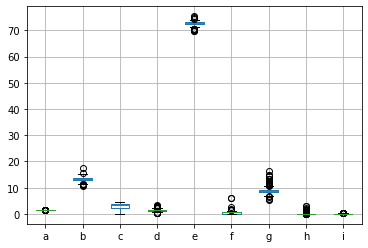

In [2]:
#b. A graphical analysis of the additives, including a distribution study.
additives.boxplot()

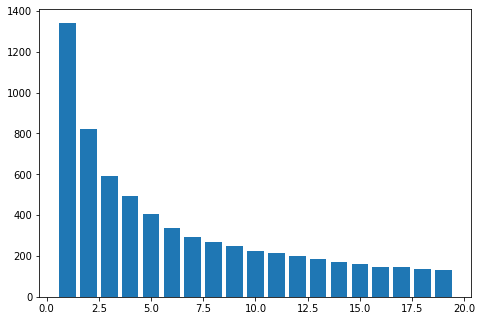

There are probably 5 formulations


In [12]:
from sklearn.cluster import KMeans
sse = []
for k in range(1,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(additives)
    sse.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(range(1,20)),sse)
plt.show()

#elbow locating
from kneed import KneeLocator
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")
kl.elbow
print ("There are probably {} formulations".format(kl.elbow))

Q2. A team of plantation planners are concerned about the yield of oil palm trees, which seems to fluctuate. They have collected a set of data and needed help in analysing on how external factors influence fresh fruit bunch (FFB) yield. Some experts are of opinion that the flowering of oil palm tree determines the FFB yield, and are linked to the external factors. Perform the analysis, which requires some study on the background of oil palm tree physiology.
(refer attachment palm_ffb.csv)

In [47]:
def create_lags(dataset,lag=24,months_ahead=1):
  newdataset=pd.DataFrame()
  newdataset=dataset
  for i in range(months_ahead,lag):
    lag=dataset.shift(i)
    lag.columns= [str(col) + "lag" + str(i) for col in lag.columns]   
    newdataset=pd.concat([newdataset,lag],axis=1)
  return(newdataset)

additives=pd.read_csv("E:\\palm_ffb.csv")
labels=additives['FFB_Yield']
del additives['FFB_Yield']
features=additives
del features['Date']
features=create_lags(features,lag=24,months_ahead=1)
newset=pd.concat([labels,features],axis=1)
corr=newset.corr()['FFB_Yield']
positives=corr[corr>0.3]
negatives=corr[corr<-0.3]
display(positives)
display(negatives)

#SoilMoisture of Lag 8-10 and 21-23 are positively correlated with FFB_Yield (related with sex differentiation and inflorescence abortion). In addition, SoilMoisture of Lag
#2-4 (related with oil synthesis) and 13-16 (unknown why) are negatively correlated with FFB_Yield.



FFB_Yield             1.000000
Average_Templag2      0.363765
HA_Harvestedlag2      0.321457
Average_Templag3      0.358598
HA_Harvestedlag3      0.504340
Average_Templag4      0.308133
HA_Harvestedlag4      0.588006
HA_Harvestedlag5      0.577954
HA_Harvestedlag6      0.359143
SoilMoisturelag8      0.490984
SoilMoisturelag9      0.598872
SoilMoisturelag10     0.555050
Precipitationlag10    0.406775
SoilMoisturelag11     0.315811
Precipitationlag11    0.458746
Average_Templag13     0.409591
Average_Templag14     0.499102
Max_Templag14         0.385132
Average_Templag15     0.468512
Max_Templag15         0.342917
HA_Harvestedlag15     0.469515
Average_Templag16     0.409239
Max_Templag16         0.341978
HA_Harvestedlag16     0.543219
HA_Harvestedlag17     0.489346
HA_Harvestedlag18     0.310773
SoilMoisturelag21     0.429758
SoilMoisturelag22     0.446148
SoilMoisturelag23     0.314183
Precipitationlag23    0.355717
Name: FFB_Yield, dtype: float64

HA_Harvested        -0.350222
SoilMoisturelag2    -0.379371
SoilMoisturelag3    -0.383050
SoilMoisturelag4    -0.319214
Average_Templag8    -0.527557
Average_Templag9    -0.638095
Max_Templag9        -0.443184
HA_Harvestedlag9    -0.452553
Average_Templag10   -0.520753
Max_Templag10       -0.445468
HA_Harvestedlag10   -0.537247
HA_Harvestedlag11   -0.483578
SoilMoisturelag13   -0.352174
SoilMoisturelag14   -0.498052
SoilMoisturelag15   -0.505803
SoilMoisturelag16   -0.433719
Average_Templag20   -0.422841
Average_Templag21   -0.550222
Max_Templag21       -0.439658
HA_Harvestedlag21   -0.507025
Average_Templag22   -0.421464
Max_Templag22       -0.421188
HA_Harvestedlag22   -0.584855
HA_Harvestedlag23   -0.500167
Name: FFB_Yield, dtype: float64

Q3. Feed the following paragraph into your favourite data analytics tool, and answer the following:

a. What is the probability of the word “data” occurring in each line ?

b. What is the distribution of distinct word counts across all the lines ?

c. What is the probability of the word “analytics” occurring after the word “data” ?

In [20]:
#a. What is the probability of the word “data” occurring in each line ?
with open ("E:\text.txt","r") as file1:
    input1=file1.readlines()
probabilities=[]
for input in input1:
    search_indices=[x[0] for x in enumerate(input.split(" ")) if x[1]=="data"]
    probability=len(search_indices)/len(input.split(" "))
    probabilities.append(probability)
probabilities  

[0.06666666666666667,
 0.0,
 0.0,
 0.058823529411764705,
 0.058823529411764705,
 0.06666666666666667,
 0.0,
 0.0,
 0.0,
 0.08333333333333333,
 0.0,
 0.05555555555555555,
 0.13333333333333333,
 0.07692307692307693,
 0.0625,
 0.0,
 0.0,
 0.14285714285714285,
 0.07142857142857142,
 0.0,
 0.07142857142857142,
 0.0]

In [53]:
#b. What is the distribution of distinct word counts across all the lines ?
import re
all=''.join(input1)
all=all.replace('\n',' ')
all=re.sub('[^A-Za-z0-9 ]', '', all)
all=all.lower()
sets=set(all.split(' '))

res={}
for word in all.split(' '):
    try:
        res[word]+=1
    except:
        res[word]=1
    
for i in res.items():
    print(i)

('as', 2)
('a', 10)
('term', 3)
('data', 18)
('analytics', 10)
('predominantly', 1)
('refers', 1)
('to', 11)
('an', 1)
('assortment', 1)
('of', 10)
('applications', 1)
('from', 2)
('basic', 1)
('business', 4)
('intelligence', 1)
('bi', 2)
('reporting', 1)
('and', 9)
('online', 1)
('analytical', 1)
('processing', 1)
('olap', 1)
('various', 1)
('forms', 1)
('advanced', 2)
('in', 6)
('that', 4)
('sense', 1)
('its', 1)
('similar', 1)
('nature', 1)
('another', 1)
('umbrella', 1)
('for', 2)
('approaches', 1)
('analyzing', 1)
('', 5)
('with', 3)
('the', 11)
('difference', 1)
('latter', 1)
('is', 4)
('oriented', 1)
('uses', 2)
('while', 2)
('has', 2)
('broader', 1)
('focus', 1)
('expansive', 1)
('view', 2)
('isnt', 1)
('universal', 1)
('though', 1)
('some', 1)
('cases', 1)
('people', 1)
('use', 1)
('specifically', 1)
('mean', 1)
('treating', 1)
('separate', 1)
('category', 1)
('initiatives', 1)
('can', 5)
('help', 1)
('businesses', 1)
('increase', 1)
('revenues', 1)
('improve', 1)
('operationa

In [89]:
#c. What is the probability of the word “analytics” occurring after the word “data” ?
count1=0
count2=0

for input in input1:
    input=re.sub('[^A-Za-z0-9 ]', '', input)
    input=input.split(" ")
    search_indices=[x[0] for x in enumerate(input) if x[1]=="data"]
    if len(search_indices):
        count1+=len(search_indices)
        nextword=[x+1 for x in search_indices]
        for nextword1 in nextword:
            if input[nextword1]=="analytics":
                count2+=1
probability_anaytics=count2/count1
probability_anaytics

#not consideringg 'data,', 

0.26666666666666666